Вся работа выполнена в Google Colab.

# Данные

In [524]:
# Чтобы данные в конце были неизменны
import os
os.environ["PYTHONHASHSEED"] = "42"

В этой лабораторной работе будем работать с [датасетом](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset), предназначенным для обучения алгоритма рекомендаций книг.

Для рекомендаций нам понадобятся таблицы `Books.csv` и `Ratings.scv`. Файл с рейтингами можно найти в папке с лабораторной работой на гитхабе. Файл с описаниями книг слишком большой, поэтому он располагается только по ссылке:
1. Файл с рейтингами (такой же, как в гитхабе): https://drive.google.com/file/d/1Hliaee7Y584-7lMoGeGjGabRRubzdoYn/view?usp=sharing
2. Файл с книгами:  https://drive.google.com/file/d/1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy/view?usp=sharing

In [525]:
import pandas as pd

In [526]:
!gdown 1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
!gdown 1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy

Downloading...
From: https://drive.google.com/uc?id=1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
To: /content/Ratings.csv
100% 22.6M/22.6M [00:00<00:00, 125MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy
To: /content/Books.csv
100% 73.3M/73.3M [00:00<00:00, 152MB/s]


Посмотрим на таблицу `Ratings`.

In [527]:
ratings = pd.read_csv("Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [528]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [529]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1149780.0,140386.395126,80562.277718,2.0,70345.0,141010.0,211028.0,278854.0
Book-Rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


Как распределяются рейтинги?

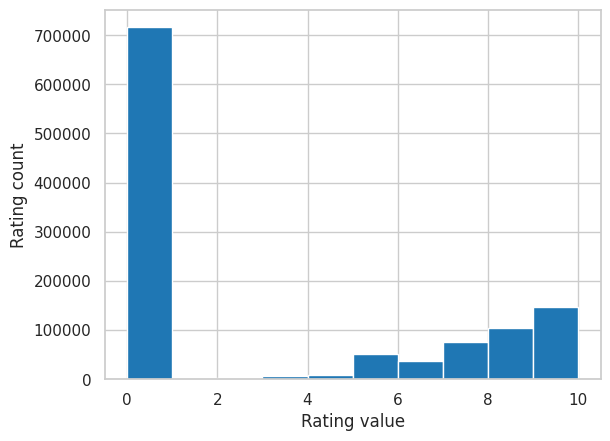

In [530]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")
sns.set_style("whitegrid")

ratings["Book-Rating"].hist()
plt.xlabel("Rating value")
plt.ylabel("Rating count")
plt.show()

Теперь посмотрим на таблицу `Books`.

In [531]:
books = pd.read_csv("Books.csv")
books.head()

<ipython-input-531-7dc4eb500039>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [532]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


- Есть немножко пропусков.
- Проверим уязвимую часть данных – года – на адекватность.

In [533]:
books["Year-Of-Publication"].value_counts().sort_values(ascending=True)[:10]

,count
Year-Of-Publication,
2037,1
2011,1
2038,1
1938,1
1906,1
1919,1
1926,1
1926,1
2008,1


Есть года, которые еще не наступили...

Проверим, есть ли строковые данные в столбце с годом (потому что `info()` назвал тип данных столбца `object`).

In [534]:
books[books["Year-Of-Publication"].map(str).str.match("[^0-9]")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


В трех строках пропущен автор, из-за чего смещены данные. Автор либо пропущен, либо склеен с названием. Надо проверить.

В сводке написано, что часть авторов и издателей провущена. Проверим, так ли это.

In [535]:
books[(books["Book-Author"].isnull()) | (books["Publisher"].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


Да, это так. Основные проблемы с данными выявили. Пора их исправлять и приступать к созданию рекомендаций.

# План анализа данных

1. Обработать данные, т.к. в данных есть несколько небольших проблем:
  1. В паре строк в таблице `Books.scv` значения столбцов сдвинуты вправо, а еще есть года, которые еще не наступили.
  2. В нескольких строках в таблице `Books.scv` есть пропуски, а также для рекомендаций в рамках лабораторной не понадобятся ссылки на картинки с обложкой.
  3. Не будем использовать для обучения записи с рейтинг равным 0 из таблицы `Ratings.scv`. Считаем, что 0 означает, что пользователь еще не оценивал книгу, но проявил к ней какой-то интерес.
  4. Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем (хотя это на самом деле будет не сильно сказываться на обобщающей способности алгоритмов, можете сами проверить).
  5. Пункты 1-4 необходимы и достаточны для выполнения всех задач. Но можно сделать более глубокую обработку.
2. Обучить [SVD](https://surprise.readthedocs.io/en/stable/getting_started.html) на следующих записях: у книги есть хотя бы одна оценка, пользователь оценил хотя бы одну книгу.
   - МАЕ должно быть ниже 1.3 (для этого есть тест)
   - **Сохранить модель.**
3. Научить линейную регрессию ([SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)) предсказывать средний рейтинг книги по следующим столбцам: автор, издатель, год издания, векторизованное название (для векторизации можно использовать [tf-idf](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting), [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) или более сложный алгоритм. Для достижения требуемой тестом точности достаточно будет tf-idf. Собрав полностью датасет, не забудьте нормализовать данные ([StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).
   - МАЕ должно быть ниже 1.5 (для этого есть тест)
   - **Сохранить модель.**
4. В файле `personal_recommendation.py` создайте рекомендацию для пользователя, у которого в исходном датасете было больше всего 0 среди рейтингов книг.
   Алгоритм такой:
   1. Находим нужного пользователя.
   2. Делаем предсказание SVD для книг, которым он "поставил" 0.
   3. Берем те книги, для которых предсказали рейтинг не ниже 8. Считаем, что 8 означет, что книга ему точно понравится.
   4. Делаем предсказание LinReg для этих же книг.
   5. Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели.
   6. В конце файла комментарием записываем полученную рекомендацию.

- То есть идея в том, чтобы сделать для пользователя индивидуальную рекомендацию, показывая в начале списка те книги, которые в целом могли бы иметь высокий рейтинг.
- Обязательно сохраняйте готовую модель и добавляйте ее в свой репозиторий, потому что файл с сохраненной моделью используется в тестах.

# Куда сдавать?

По инструкции в гитхаб – https://shy-question-39d.notion.site/1150ea832e418032bfc3d3e827c380fb?pvs=74

- К этой работе есть два теста – на качество получившихся моделей.
- Пул-реквест нужно сделать в ветку `lab2`.
- Можно загрузить в гитхаб файлы с реализацией по шаблону (шаблон можно дополнять и изменять под себя) или подготовить колаб с решением. Главное – сохранить модели, тесты проверяют их.

> Будьте внимательны! На гитхабе в ветке `main` обновился файл `pyad.yml`.

**Устная защита работ не требуется, но вам могут быть заданы вопросы прямо в вашем пул-реквесте!**

# Непосредственно работа

## Обработка данных

### Пункт 1

В паре строк в таблице Books.scv значения столбцов сдвинуты вправо, а еще есть года, которые еще не наступили.

Для начала разберемся с авторами. Проверим сдвиги и найдем авторов.

In [536]:
# Выявляем строки, где крайний столбец пустой (вероятен сдвиг)
missing_url = books[books['Image-URL-L'].isnull()]

In [537]:
missing_url

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


3 строки содержат сдвиг влево. При этом столбец с автором содержит год, а сам автор либо отсутствует, либо склеен с названием. Проверим второй вариант.

In [538]:
# Проверка на склейку с автором через ;
def check_shift(row):
    if pd.isnull(row['Image-URL-L']) and ';' in str(row['Book-Title']):
        return True
    return False

In [539]:
shifted_rows = books[books.apply(check_shift, axis=1)]

In [540]:
shifted_rows

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Каждая строка содержит вероятную склейку. Попробуем вычленить авторов из названия книг.

In [541]:
def fix_row(row):
    if check_shift(row):
        # Разделяем поле "Book-Title" на название и автора
        parts = row['Book-Title'].split(';', 1)
        if len(parts) == 2:
            # Делаем сдвиг
            row['Image-URL-L'] = row['Image-URL-M']
            row['Image-URL-M'] = row['Image-URL-S']
            row['Image-URL-S'] = row['Publisher']
            row['Publisher'] = row['Year-Of-Publication']
            row['Year-Of-Publication'] = row['Book-Author']
            row['Book-Title'], row['Book-Author'] = parts[0].strip(), parts[1].strip()
    return row

In [542]:
books_fixed = books.apply(fix_row, axis=1)

Проверим, что получилось.

In [543]:
new_missing_url = books[books['Image-URL-L'].isnull()]

In [544]:
new_missing_url

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


Как видим, пустых значений в Image-URL-L больше нет (логично). Посмотрим, что стало с теми строками.

In [545]:
indices = [209538, 220731, 221678] # индексы проблемных строк
selected_rows = books.loc[indices]

In [546]:
selected_rows

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...","Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\""","Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...","James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


Теперь мы имеем почти нормальные данные. Стоит привести в порядок столбец авторов и убрать лишние знаки.

In [547]:
import re

In [548]:
# Функция для очистки имен авторов
def clean_author_name(name):
    if pd.isnull(name):
        return name
    # Оставляем только буквы, пробелы и допустимые символы
    return re.sub(r'[^a-zA-Zа-яА-ЯёЁ .,;\'\-]', '', name).strip()

In [549]:
# Применяем функцию к столбцу "Book-Author"
books['Book-Author'] = books['Book-Author'].apply(clean_author_name)

In [550]:
new_selected_rows = books.loc[indices]

In [551]:
new_selected_rows

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\""",Jean-Marie Gustave Le Clzio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


Возможно, чистка произошла не лучшим образом, но мы постарались :)

Теперь разберемся с годом

In [552]:
current_year = pd.Timestamp.now().year
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
books.loc[books['Year-Of-Publication'] > current_year, 'Year-Of-Publication'] = 2024 # если год некорректный, поставим сегодняшний

In [553]:
books["Year-Of-Publication"].value_counts().sort_values(ascending=True)[:20]

,count
Year-Of-Publication,
1376,1
1919,1
1378,1
2008,1
2012,1
1897,1
1914,1
1904,1
1806,1


Года стали адекватными.

In [554]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  int64 
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271360 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


Года содержат только числа, ура

### Пункт 2

В нескольких строках в таблице Books.scv есть пропуски, а также для рекомендаций в рамках лабораторной не понадобятся ссылки на картинки с обложкой.

Для начала избавимся от столбцов с ссылками.

In [555]:
# Удаление ненужных столбцов
books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], inplace=True)

In [556]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


Действительно избавились. Теперь посмотрим на отсутствующие значения.

In [557]:
rows_with_missing_values = books[books[['Book-Author', 'Publisher']].isnull().any(axis=1)]

In [558]:
rows_with_missing_values

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


Заменим пустые значения на Unknown.

In [559]:
books['Book-Author'] = books['Book-Author'].fillna('Unknown')
books['Publisher'] = books['Publisher'].fillna('Unknown')

In [560]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int64 
 4   Publisher            271360 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


### Пункты 3 и 4

Не будем использовать для обучения записи с рейтинг равным 0 из таблицы Ratings.scv. Считаем, что 0 означает, что пользователь еще не оценивал книгу, но проявил к ней какой-то интерес.

In [561]:
# Удаление записей с рейтингом равным (или меньше) 0
ratings = ratings[ratings['Book-Rating'] > 0]

Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем.

In [562]:
# Фильтрация книг с единственной оценкой
book_counts = ratings['ISBN'].value_counts()
books_with_multiple_ratings = book_counts[book_counts > 1].index
ratings = ratings[ratings['ISBN'].isin(books_with_multiple_ratings)]

In [563]:
# Фильтрация пользователей, которые оценили только одну книгу
user_counts = ratings['User-ID'].value_counts()
users_with_multiple_ratings = user_counts[user_counts > 1].index
ratings = ratings[ratings['User-ID'].isin(users_with_multiple_ratings)]

In [564]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266402 entries, 16 to 1149775
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      266402 non-null  int64 
 1   ISBN         266402 non-null  object
 2   Book-Rating  266402 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.1+ MB


Было 1149780 значений, стало 266402. Такие дела

Теперь нам надо из датасета с книгами убрать те, которые оценились 1 раз

In [565]:
# Оставляем только те книги, которые остались после фильтрации
books = books[books['ISBN'].isin(ratings['ISBN'])]

In [566]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49870 entries, 1 to 270899
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 49870 non-null  object
 1   Book-Title           49870 non-null  object
 2   Book-Author          49870 non-null  object
 3   Year-Of-Publication  49870 non-null  int64 
 4   Publisher            49870 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.3+ MB


Книжек стало резко меньше :(

In [567]:
# Проверяем на соединяемость таблиц
merged_data = ratings.merge(books, on='ISBN')

In [568]:
merged_data

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch
1,276747,0671537458,9,Waiting to Exhale,Terry McMillan,1995,Pocket
2,276747,0679776818,8,Birdsong: A Novel of Love and War,Sebastian Faulks,1997,Vintage Books USA
3,276762,0380711524,5,See Jane Run,Joy Fielding,1992,Avon
4,276762,3453092007,8,Die zweite Haut.,Dean Koontz,1995,Heyne
...,...,...,...,...,...,...,...
251165,276688,0892966548,10,Killer Market: A Deborah Knott Mystery (Debora...,Margaret Maron,1997,Warner Books Inc
251166,276688,1551669315,6,The Third Wife,Jasmine Cresswell,2002,Mira
251167,276704,0345386108,6,Winter Moon,Dean R. Koontz,1995,Ballantine Books
251168,276704,0743211383,7,Dreamcatcher,Stephen King,2001,Scribner


Обработка завершена. В гитхабе увидела обработку с токенизацией, однако в условии колаба сказано, что данных шагов достаточно, поэтому обойдемся ими.

##SVD

Обучить [SVD](https://surprise.readthedocs.io/en/stable/getting_started.html) на следующих записях: у книги есть хотя бы одна оценка, пользователь оценил хотя бы одну книгу.
   - МАЕ должно быть ниже 1.3 (для этого есть тест)
   - **Сохранить модель.**

Используем библиотеку surpise

In [569]:
!pip install surprise

In [570]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
import pickle

In [571]:
reader = Reader(rating_scale=(1, 10))  # Диапазон рейтингов
ratings_data = Dataset.load_from_df(ratings[["User-ID", "ISBN", "Book-Rating"]], reader)

In [572]:
trainset, testset = train_test_split(ratings_data, test_size=0.2, random_state=42) # обучающая и тестовая выборки

In [573]:
# Обучение модели SVD
model = SVD()
model.fit(trainset)

In [574]:
# Оценка на тестовой выборке
predictions = model.test(testset)
mae = accuracy.mae(predictions)

MAE:  1.2539


Модель обучена успешно :з Сохраним ее.

In [575]:
with open("svd.pkl", "wb") as f:
    pickle.dump(model, f)

UPD: По непонятным мне причинам, данная модель не проходит тесты :( Была попытка улучшить модель, но не получилось (удалено из колаба)

## SGDRegressor

Научить линейную регрессию ([SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)) предсказывать средний рейтинг книги по следующим столбцам: автор, издатель, год издания, векторизованное название (для векторизации можно использовать [tf-idf](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting), [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) или более сложный алгоритм. Для достижения требуемой тестом точности достаточно будет tf-idf. Собрав полностью датасет, не забудьте нормализовать данные ([StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).
   - МАЕ должно быть ниже 1.5 (для этого есть тест)
   - **Сохранить модель.**

Сделаем нужные импорты

In [576]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

Теперь сделаем некоторую предобработку

In [577]:
# Вычислим средний рейтинг книги
average_ratings = ratings.groupby('ISBN')['Book-Rating'].mean().reset_index()
# average_ratings.rename(columns={'Book-Rating': 'Average-Rating'}, inplace=True)

# Объединим таблицы книг и среднего рейтинга
data = books.merge(average_ratings, on='ISBN', how='inner')

# Удалим записи с пустыми значениями
data = data.dropna()

In [578]:
# Векторизация названия книги
tfidf = TfidfVectorizer(max_features=1000)
book_title_vectors = tfidf.fit_transform(data['Book-Title']).toarray()

# Кодирование категориальных признаков
encoded_author = LabelEncoder()
encoded_publisher = LabelEncoder()

data['Encoded-Author'] = encoded_author.fit_transform(data['Book-Author'])
data['Encoded-Publisher'] = encoded_publisher.fit_transform(data['Publisher'])

# Масштабируем числовые признаки
scaler = StandardScaler()
books_scaled = scaler.fit_transform(data[['Encoded-Author', 'Year-Of-Publication','Encoded-Publisher']])

# Объединение всех признаков
X = pd.concat([pd.DataFrame(books_scaled), pd.DataFrame(book_title_vectors)], axis=1)
y = data['Book-Rating']

In [579]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = SGDRegressor(max_iter=5000, tol=1e-5, learning_rate='adaptive', random_state=42)
model.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

MAE: 0.9846321784169861


MAE соответствует условию, поэтому сохраняем модель

In [580]:
with open("linreg.pkl", "wb") as file:
    pickle.dump(model, file)

# Проверка на тестах

In [581]:
def test_svd_recs():
    with open('svd.pkl', 'rb') as f:
        loaded_svd = pickle.load(f)
    td = pd.read_csv("svd_test.csv")
    predictions = loaded_svd.test(td.values)
    mae = accuracy.mae(predictions)
    assert mae <= 1.3

def test_linreg_recs():
    with open('linreg.pkl', 'rb') as f:
        loaded_linreg = pickle.load(f)
    td = pd.read_csv("linreg_test.csv")
    y = td.pop("y")
    predictions = loaded_linreg.predict(td)
    mae = mean_absolute_error(y, predictions)
    assert mae <= 1.5

In [582]:
test_svd_recs()

MAE:  1.4490


AssertionError: 

In [583]:
test_linreg_recs()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


ValueError: X has 1004 features, but SGDRegressor is expecting 1003 features as input.

# Персональные рекомендации

В файле `personal_recommendation.py` создайте рекомендацию для пользователя, у которого в исходном датасете было больше всего 0 среди рейтингов книг.
   Алгоритм такой:
   1. Находим нужного пользователя.
   2. Делаем предсказание SVD для книг, которым он "поставил" 0.
   3. Берем те книги, для которых предсказали рейтинг не ниже 8. Считаем, что 8 означет, что книга ему точно понравится.
   4. Делаем предсказание LinReg для этих же книг.
   5. Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели.
   6. В конце файла комментарием записываем полученную рекомендацию.

- То есть идея в том, чтобы сделать для пользователя индивидуальную рекомендацию, показывая в начале списка те книги, которые в целом могли бы иметь высокий рейтинг.
- Обязательно сохраняйте готовую модель и добавляйте ее в свой репозиторий, потому что файл с сохраненной моделью используется в тестах.

(Выполнила в колабе, а не в отдельном файле, надеюсь так можно было)

Для начала подготовим все нужные данные.

In [597]:
data_of_ratings = pd.read_csv('Ratings.csv')
data_of_books = pd.read_csv('Books.csv')

<ipython-input-597-61ece8d412a3>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_of_books = pd.read_csv('Books.csv')


Загрузим наши модели.

In [598]:
with open('svd.pkl', 'rb') as svd_file:
    svd_model = pickle.load(svd_file)

with open('linreg.pkl', 'rb') as linreg_file:
    linreg_model = pickle.load(linreg_file)

Находим нужного пользователя.

In [599]:
# Находим пользователя с наибольшим количеством "нулевых" рейтингов
user_zero_counts = data_of_ratings[data_of_ratings['Book-Rating'] == 0].groupby('User-ID').size()
target_user = user_zero_counts.idxmax()

In [600]:
target_user

198711

Пользователь, который поставил больше всего 0 имеет айди 198711.

Теперь найдем книги, которым он поставил по 0.

In [601]:
# Книги, которым пользователь поставил рейтинг 0
target_books = data_of_ratings[(data_of_ratings['User-ID'] == target_user)
    & (data_of_ratings['Book-Rating'] == 0)]['ISBN']

In [602]:
target_books

,ISBN
816071,000123207X
816072,0001232088
816073,0001931377
816074,000225218X
816075,0003293459
...,...
823616,8511839102
823617,9307166813
823618,9590624067
823619,9631172937


Сделаем предсказание SVD.

In [603]:
# Предсказание SVD
predicted_ratings = []
for isbn in target_books:
    predicted_rating = svd_model.predict(target_user, isbn).est
    if predicted_rating >= 8:
        predicted_ratings.append((isbn, predicted_rating))

In [604]:
predicted_ratings

[('0060915544', 8.268140555261866),
 ('0060928336', 8.076951857565978),
 ('0064400042', 8.43661956106801),
 ('0064400557', 8.61866704185634),
 ('0064400565', 8.05701937285614),
 ('0064401847', 8.281545003644283),
 ('0064405052', 8.13014916960787),
 ('0064409422', 8.015690994171841),
 ('0064430227', 8.035704549955332),
 ('0064471101', 8.19787233954341),
 ('0312924585', 8.320074411733458),
 ('0345361792', 8.12146503580836),
 ('0373834284', 8.059619964456559),
 ('0380698714', 8.097842939438248),
 ('0393307050', 8.084491602365821),
 ('039480029X', 8.075411721948377),
 ('0425129586', 8.190097354676931),
 ('0439064872', 8.080467166936687),
 ('0440219078', 8.247143083895878),
 ('0440223202', 8.283862673602934),
 ('0440235502', 8.072733139679727),
 ('0440498058', 8.373968372220157),
 ('0440901588', 8.046972791621466),
 ('0451163966', 8.049400685757169),
 ('0451628047', 8.128053981092245),
 ('0515132020', 8.025396392121717),
 ('055321246X', 8.09875961265071),
 ('0553272535', 8.056854452803826),

Берем книги с предсказанным рейтингом равным не ниже 8.

In [605]:
# Отбираем книги с рейтингом >= 8
selected_books = pd.DataFrame(predicted_ratings, columns=['ISBN', 'SVD-Rating'])

Делаем предсказание LinReg для этих же книг

In [606]:
# Подготовка данных для линейной регрессии
# Векторизация названия книг
tfidf = TfidfVectorizer(max_features=1000)
tfidf.fit(data_of_books['Book-Title'])
book_title_vectors = tfidf.transform(
    data_of_books[data_of_books['ISBN'].isin(selected_books['ISBN'])]['Book-Title']
).toarray()

# Кодирование авторов и издателей
encoded_author = LabelEncoder()
encoded_publisher = LabelEncoder()
data_of_books['Encoded-Author'] = encoded_author.fit_transform(data_of_books['Book-Author'])
data_of_books['Encoded-Publisher'] = encoded_publisher.fit_transform(data_of_books['Publisher'])

# Масштабируем числовые признаки
scaler = StandardScaler()
books_scaled = scaler.fit_transform(
    data_of_books[data_of_books['ISBN'].isin(selected_books['ISBN'])][['Encoded-Author', 'Year-Of-Publication', 'Encoded-Publisher']]
)

# Объединяем все признаки
X_linreg = pd.concat([pd.DataFrame(books_scaled), pd.DataFrame(book_title_vectors)], axis=1)

# Предсказания линейной регрессии
selected_books['LinReg-Rating'] = linreg_model.predict(X_linreg)

Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели.

In [607]:
# Сортировка по рейтингу линейной модели
selected_books = selected_books.sort_values(by='LinReg-Rating', ascending=False)

In [608]:
# Добавление информации о книгах
final_recommendations = selected_books.merge(
    books[['ISBN', 'Book-Title', 'Book-Author']],
    on='ISBN',
    how='left'
)

In [609]:
final_recommendations[['ISBN', 'Book-Title', 'Book-Author', 'SVD-Rating', 'LinReg-Rating']]

,ISBN,Book-Title,Book-Author,SVD-Rating,LinReg-Rating
0,0064405052,The Magician's Nephew (Narnia),C. S. Lewis,8.130149,8.209096
1,0064400557,Charlotte's Web (Trophy Newbery),E. B. White,8.618667,8.077341
2,055321246X,Walden and Other Writings,HENRY DAVID THOREAU,8.098760,8.072574
3,0060915544,The Bean Trees,Barbara Kingsolver,8.268141,8.020105
4,0743454146,The Footprints of God : A Novel,Greg Iles,8.011067,8.006978
5,0393307050,Master and Commander (Aubrey-Maturin (Paperback)),Patrick O'Brian,8.084492,7.987094
6,0380698714,Sideways Stories from Wayside School (Wayside ...,Louis Sachar,8.097843,7.979342
7,067168390X,Lonesome Dove,Larry McMurtry,8.800193,7.857579
8,0345361792,A Prayer for Owen Meany,John Irving,8.121465,7.849374
9,0064471101,The Magician's Nephew (rack) (Narnia),C. S. Lewis,8.197872,7.810986
